<a href="https://colab.research.google.com/github/N1khil-J4dhav/College/blob/main/Experiment9_Iris_Dataset_Classification(K_Means_Manual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

In [ ]:
# Upload CSV
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving iris_synthetic_data.csv to iris_synthetic_data (1).csv


In [ ]:
# Rename columns if needed
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']

In [ ]:
# Features only (no labels for clustering)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

In [ ]:
# Standardize features (optional but recommended)
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
# Run K-Means
clusters, centroids = kmeans(X, k=3)

In [ ]:
# K-Means implementation
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for i in range(max_iters):
        # Assign points to nearest centroid
        distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        clusters = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return clusters, centroids

In [ ]:
# Map clusters to true labels for evaluation (optional)
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [ ]:
# True labels (encoded)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_true = le.fit_transform(df['label'])

In [ ]:
# Map cluster labels to true labels
labels_map = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    if np.sum(mask) == 0:
        continue
    labels_map[mask] = mode(y_true[mask])[0]

In [ ]:
acc = accuracy_score(y_true, labels_map)
print(f"K-Means clustering accuracy (mapped): {acc:.4f}")

K-Means clustering accuracy (mapped): 0.8620


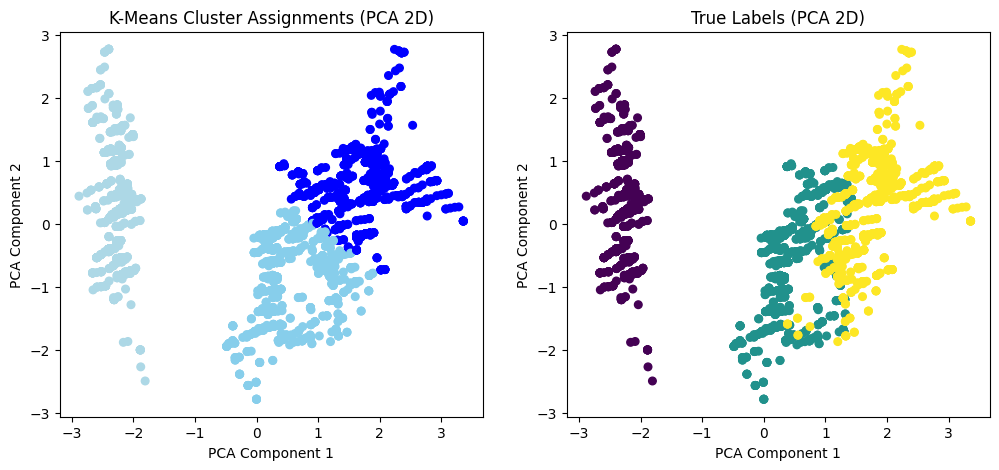

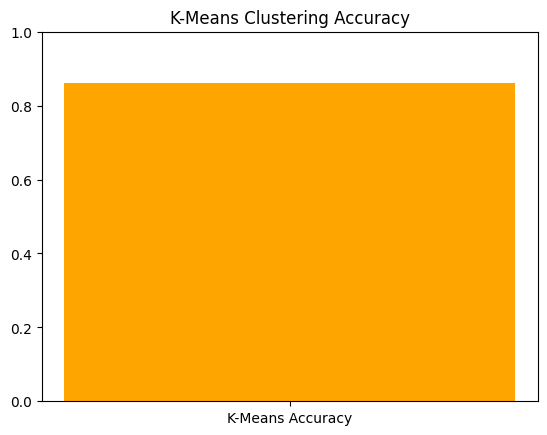

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,5))

# Define custom blues for clusters
colors = ['#ADD8E6', '#87CEEB', '#0000FF']  # very light blue, light blue, blue

# Plot K-Means clusters with custom colors
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=[colors[i] for i in clusters], s=30)
plt.title('K-Means Cluster Assignments (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot true labels with default viridis colormap
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap='viridis', s=30)
plt.title('True Labels (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

# Plot accuracy as a bar chart
plt.bar(['K-Means Accuracy'], [acc], color='orange')
plt.ylim([0, 1])
plt.title('K-Means Clustering Accuracy')
plt.show()
